In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
class_names = ['Very_Mild_Demented', 'Mild_Demented', 'Non_Demented','Moderate_Demented']

In [ ]:
path = '/content/drive/MyDrive/Alzhemier_Dataset_/Dataset'
data_dir = pathlib.Path(path)

In [ ]:
class_names = np.array([sorted(item.name for item in data_dir.glob("*"))])
class_names

array([['Mild_Demented', 'Moderate_Demented', 'Non_Demented',
        'Very_Mild_Demented']], dtype='<U18')

In [ ]:
imageCount = len(list(data_dir.glob("*/*.jpg") ))
imageCount

6400

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=(0.9,1.1),
        fill_mode='nearest')

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

# Define data directories and other parameters
data_dir = '/content/drive/MyDrive/Alzhemier_Dataset_/Dataset'
img_height = 224
img_width = 224
batch_size = 32

# Create the training dataset using image_dataset_from_directory
train_data = image_dataset_from_directory(
    data_dir,
    validation_split=0.3,  # 30% for validation and test
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Create the validation dataset using image_dataset_from_directory
val_data = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  # 30% for validation and test
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Create the test dataset using image_dataset_from_directory
test_data = image_dataset_from_directory(
    data_dir,
    validation_split=0.1,  # 30% for validation and test
    subset="validation",
    seed=123,  # Use the same seed for consistency
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 6400 files belonging to 4 classes.
Using 4480 files for training.
Found 6400 files belonging to 4 classes.
Using 1280 files for validation.
Found 6400 files belonging to 4 classes.
Using 640 files for validation.


In [ ]:
class_names = train_data.class_names
print(class_names)

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


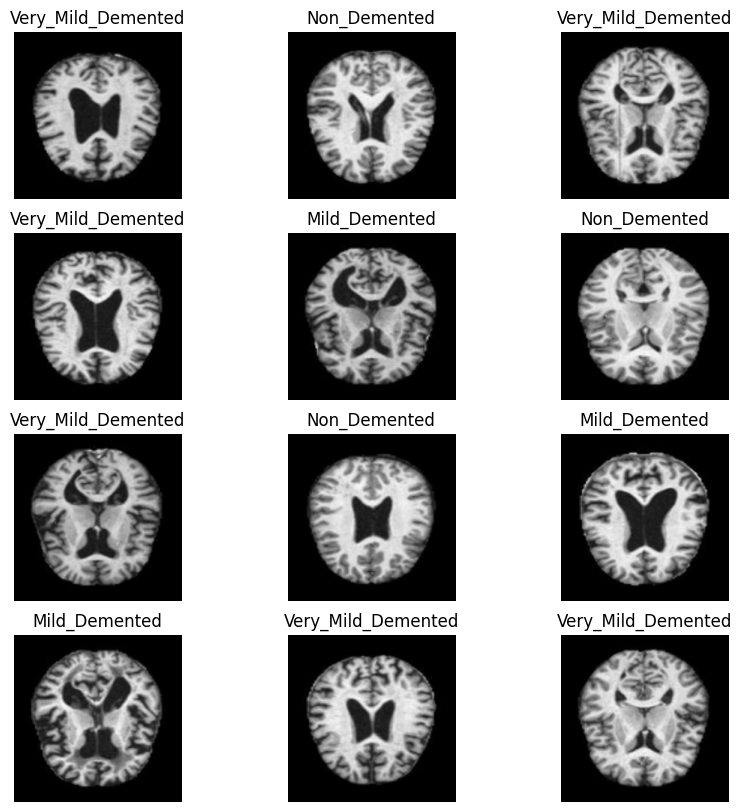

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
#libraries to build our neural netwrok model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,GlobalAveragePooling2D
#from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import backend as k
import keras
from keras.utils import to_categorical
from keras import optimizers
from keras.optimizers import SGD,Adam
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications.densenet import preprocess_input
from keras.models import Model
from tensorflow.keras.utils import img_to_array,array_to_img

#librariy to augment our dataset images
from keras.preprocessing.image import ImageDataGenerator

#libraries to calculate evalution scores of our model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
DenseNet201_model = Sequential()
pretrained_model= DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

DenseNet201_model.add(pretrained_model)
DenseNet201_model.add(GlobalAveragePooling2D())
DenseNet201_model.add(Dense(512, activation='relu'))
DenseNet201_model.add(keras.layers.Dropout(0.3))
DenseNet201_model.add(Dense(4, activation='softmax'))

74836368/74836368 [==============================] - 0s 0us/step


In [ ]:
DenseNet201_model.compile(optimizer=Adam(learning_rate=0.0001),loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3,verbose=1,mode='auto', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop,reduce_lr]

In [ ]:
epochs = 50
history = DenseNet201_model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data,
                    batch_size=batch_size)

Epoch 1/50
140/140 [==============================] - 462s 3s/step - loss: 1.2755 - accuracy: 0.4824 - val_loss: 0.9082 - val_accuracy: 0.5789
Epoch 2/50
140/140 [==============================] - 28s 201ms/step - loss: 0.9871 - accuracy: 0.5558 - val_loss: 0.8579 - val_accuracy: 0.5930
Epoch 3/50
140/140 [==============================] - 28s 197ms/step - loss: 0.8975 - accuracy: 0.5788 - val_loss: 0.8239 - val_accuracy: 0.6180
Epoch 4/50
140/140 [==============================] - 28s 197ms/step - loss: 0.8588 - accuracy: 0.5953 - val_loss: 0.8367 - val_accuracy: 0.6227
Epoch 5/50
140/140 [==============================] - 28s 200ms/step - loss: 0.8337 - accuracy: 0.6094 - val_loss: 0.8056 - val_accuracy: 0.6297
Epoch 6/50
140/140 [==============================] - 28s 198ms/step - loss: 0.8097 - accuracy: 0.6279 - val_loss: 0.7692 - val_accuracy: 0.6570
Epoch 7/50
140/140 [==============================] - 28s 200ms/step - loss: 0.7967 - accuracy: 0.6386 - val_loss: 0.7599 - val_accu

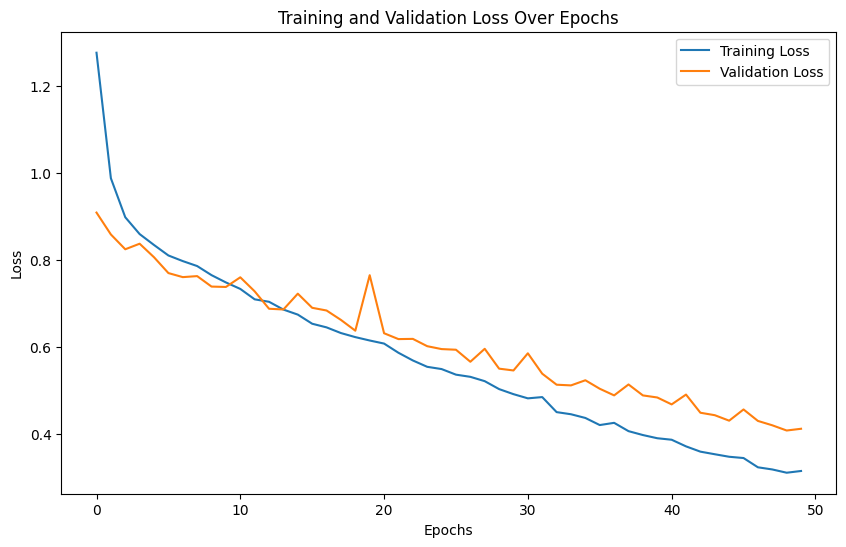

In [ ]:
# Plot a graph of training loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

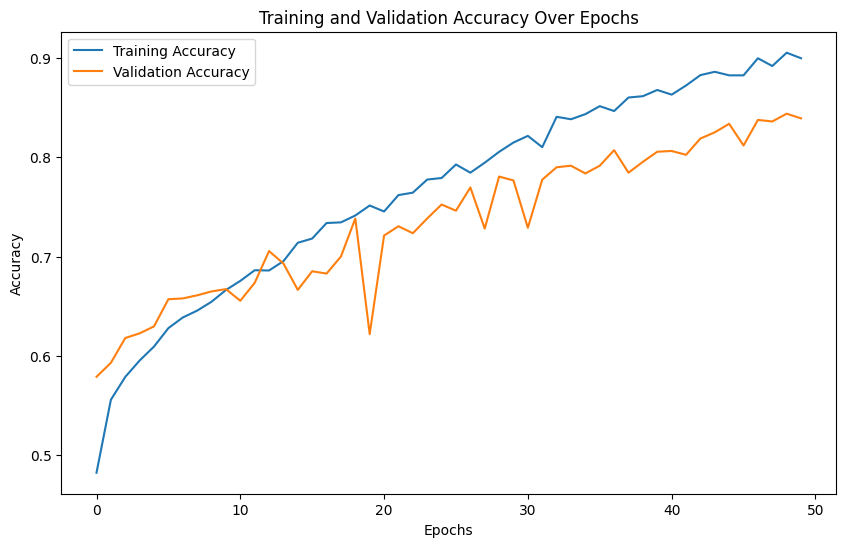

In [ ]:
# Plot a graph of training accuracy and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

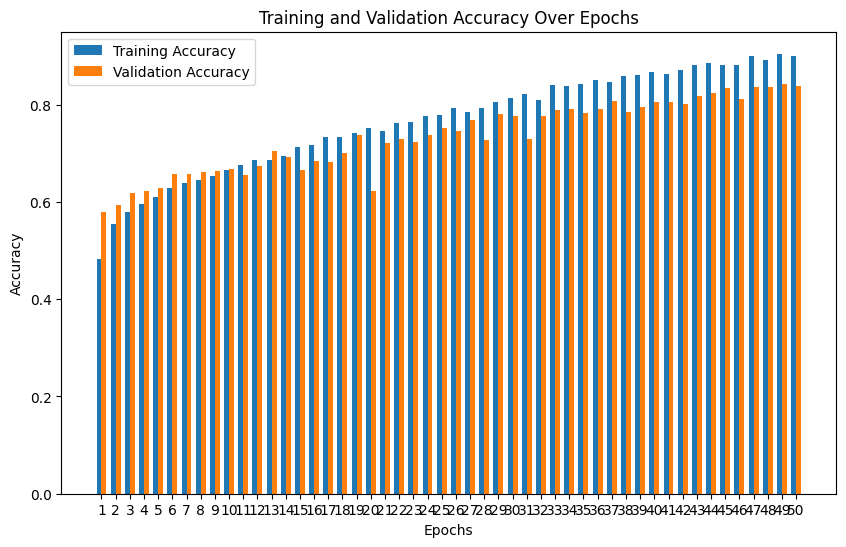

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a 'history' object with accuracy values
# Replace this with your actual data

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Generate a list of epoch numbers
epochs = range(1, len(training_accuracy) + 1)

# Set the width of the bars
bar_width = 0.35

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(epochs, training_accuracy, bar_width, label='Training Accuracy')
plt.bar([epoch + bar_width for epoch in epochs], validation_accuracy, bar_width, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.xticks([epoch + bar_width / 2 for epoch in epochs], epochs)
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Predict the labels on the test data
y_pred = DenseNet201_model.predict(test_data)
y_pred = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# True labels
y_true = np.concatenate([labels for _, labels in test_data])

# Calculate precision, recall, and F1 score for both classes
precision_class_0 = precision_score(y_true, y_pred, average=None)[0]
precision_class_1 = precision_score(y_true, y_pred, average=None)[1]
recall_class_0 = recall_score(y_true, y_pred, average=None)[0]
recall_class_1 = recall_score(y_true, y_pred, average=None)[1]
f1_class_0 = f1_score(y_true, y_pred, average=None)[0]
f1_class_1 = f1_score(y_true, y_pred, average=None)[1]

# Calculate the total precision, total recall, and total F1 score for a 50/50 ratio
total_precision = (precision_class_0 + precision_class_1) / 2
total_recall = (recall_class_0 + recall_class_1) / 2
total_f1 = (f1_class_0 + f1_class_1) / 2

print(f"Total Precision: {total_precision}")
print(f"Total Recall: {total_recall}")
print(f"Total F1 Score: {total_f1}")

In [ ]:
# Calculate test accuracy
test_loss, test_accuracy = DenseNet201_model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy}")

20/20 [==============================] - 4s 157ms/step - loss: 0.3767 - accuracy: 0.8578
Test Accuracy: 0.8578125238418579


In [ ]:
# True labels
y_true = np.concatenate([labels for _, labels in test_data])

# Get class labels
class_labels = [class_names[label] for label in range(len(class_names))]

In [ ]:
class_names = ['Very_Mild_Demented', 'Mild_Demented', 'Non_Demented','Moderate_Demented']


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have true labels (y_true) and predicted labels (y_pred)
# y_true and y_pred should be NumPy arrays with the same length

# Calculate the confusion matrix
confusion = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(confusion)